In [1]:
# Import Necessary Packages
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), (".."), "code"))
#from plotting_functions import *
#from utils import *

import altair as alt
from vega_datasets import data
# Simplify working with large datasets in Altair
alt.data_transformers.enable('vegafusion')

pd.set_option("display.max_colwidth", 200)

In [2]:
sms_df = pd.read_csv("data/spam.csv", encoding="latin-1")
sms_df = sms_df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
sms_df = sms_df.rename(columns={"v1": "target", "v2": "sms"})
sms_df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
train_df, test_df = train_test_split(sms_df, test_size=0.2, random_state=123)
train_df.head()

,target,sms
385,ham,It took Mr owl 3 licks
4003,ham,Well there's a pattern emerging of my friends telling me to drive up and come smoke with them and then telling me that I'm a weed fiend/make them smoke too much/impede their doing other things so ...
1283,ham,Yes i thought so. Thanks.
2327,spam,"URGENT! Your mobile number *************** WON a å£2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm"
1103,ham,Aiyah sorry lor... I watch tv watch until i forgot 2 check my phone.


In [4]:
train_df["length"] = train_df["sms"].str.len()

In [5]:
# Compute summary stats by class

summary = (
    train_df.groupby("target")["length"]
    .agg(["mean", "min", "max"])
    .rename(columns={"mean": "avg_len", "min": "shortest_len", "max": "longest_len"})
)

summary

,avg_len,shortest_len,longest_len
target,,,
ham,70.957845,2,790
spam,138.657980,13,224


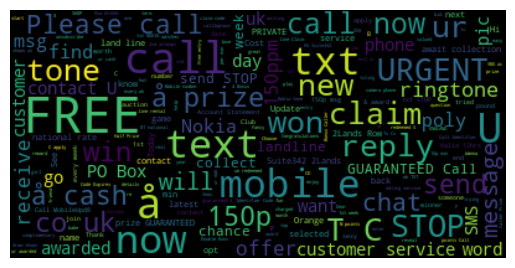

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_text = " ".join(train_df[train_df['target'] == 'spam']['sms'].astype(str))
#wordcloud = WordCloud().generate(spam_text)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(spam_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

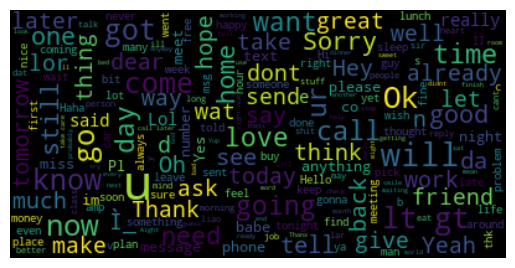

In [7]:
ham_text = " ".join(train_df[train_df['target'] == 'ham']['sms'].astype(str))

#wordcloud = WordCloud().generate(ham_text)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(ham_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()